# 회귀 트리

* 사이킷런의 결정 트리 및 결정 트리 기반의 앙상블 알고리즘은 분류 뿐만 아니라 회귀도 가능합니다.
* 이는 트리가 **CART(Classification and Regression Tree)** 를 기반으로 만들어 졌기 때문입니다.
* CART는 분류 뿐만 아니라 회귀도 가능한 트리 분할 알고리즘입니다. 
* CART회귀 트리는 분류와 유사하게 분할을 하며, 분할 기준은 RSS가 최소가 될 수 있는 기준을 찾아서 분할 됩니다. 
* 최종 분할이 완료 된 후에 각 분할 영역에 있는 데이터 결정 값들의 평균 값으로 학습/예측합니다. 


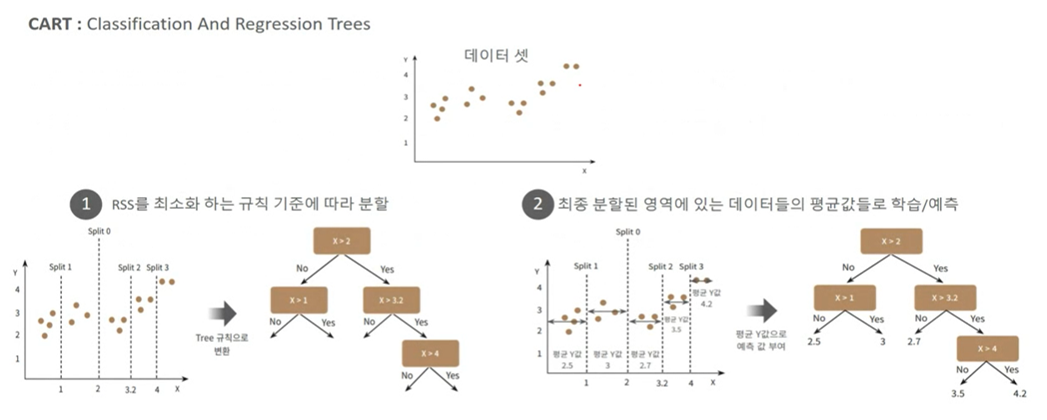

## 회귀 트리의 오버 피팅

* 회귀 트리 역시 복잡한 트리 구조를 가질 경우 오버 피팅되기 쉽습니다. 
* 트리의 크기와 노드 개수의 제한 등의 방법을 통해 오버 피팅을 개선합니다. 
* 하이퍼파라미터의 개수가 많으므로 CV와 함께 사용해서 튜닝합니다. 

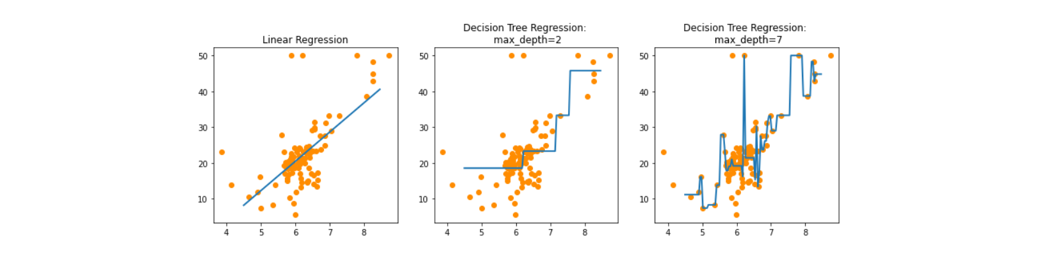

## 사이킷런의 회귀 트리 지원

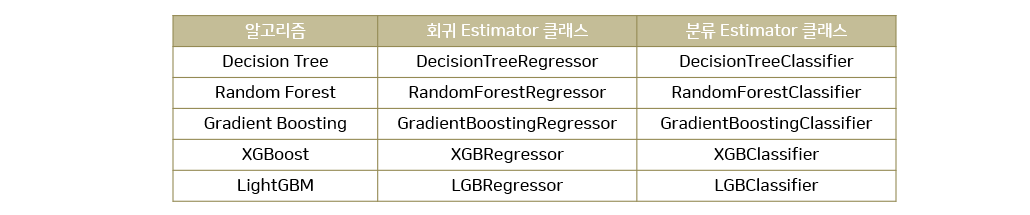

---

## 데이터 로딩

In [10]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings("ignore", category= FutureWarning)

# boston 데이타셋 로드
boston = load_boston()

boston_data = boston.data
# boston 데이타셋 DataFrame 변환 
bostonDF = pd.DataFrame(data=boston_data, columns=boston.feature_names)

In [11]:
# PRICE 컬럼으로 DataFrame에 추가함. 
bostonDF['PRICE'] = boston.target

[데이터 속성]
* CRIM: 지역별 범죄 발생률  
* ZN: 25,000평방피트를 초과하는 거주 지역의 비율
* NDUS: 비상업 지역 넓이 비율
* CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
* NOX: 일산화질소 농도
* RM: 거주할 수 있는 방 개수
* AGE: 1940년 이전에 건축된 소유 주택의 비율
* DIS: 5개 주요 고용센터까지의 가중 거리
* RAD: 고속도로 접근 용이도
* TAX: 10,000달러당 재산세율
* PTRATIO: 지역의 교사와 학생 수 비율
* B: 지역의 흑인 거주 비율
* LSTAT: 하위 계층의 비율
* MEDV: 본인 소유의 주택 가격(중앙값)

## EDA

In [16]:
#통계 정보
bostonDF.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<AxesSubplot: >

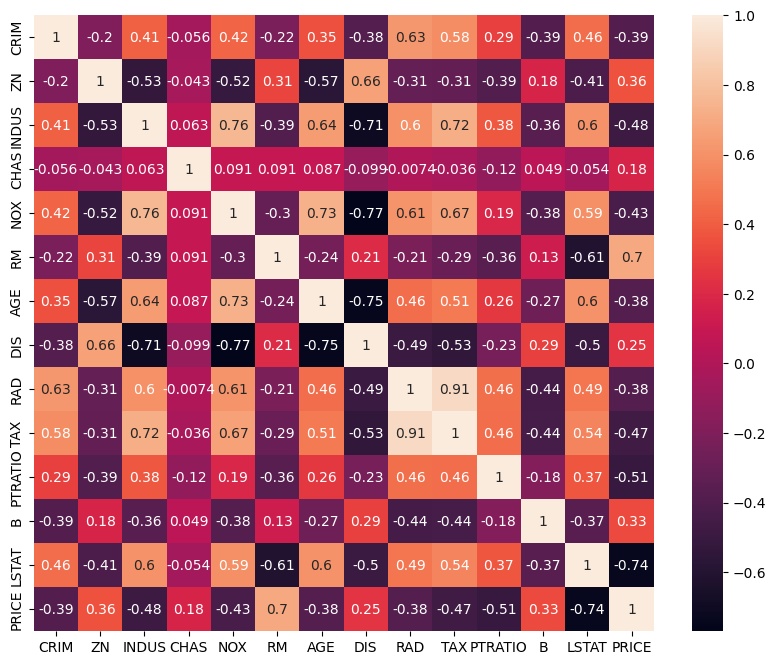

In [22]:
import matplotlib.pyplot as plt
from numpy import size
import pandas as pd
import seaborn as sns

# price와 상관관계가 높은 피처들 탐색

bostonDF.corr() # 상관계수

plt.subplots(figsize=(10,8))

sns.heatmap(bostonDF.corr(), annot=True)

> LSTAT, RM,PTRATIO가 PRICE와 상관관계가 높음<br>
하위계층의 비율, 방의 개수, 교사와 학생수 비율

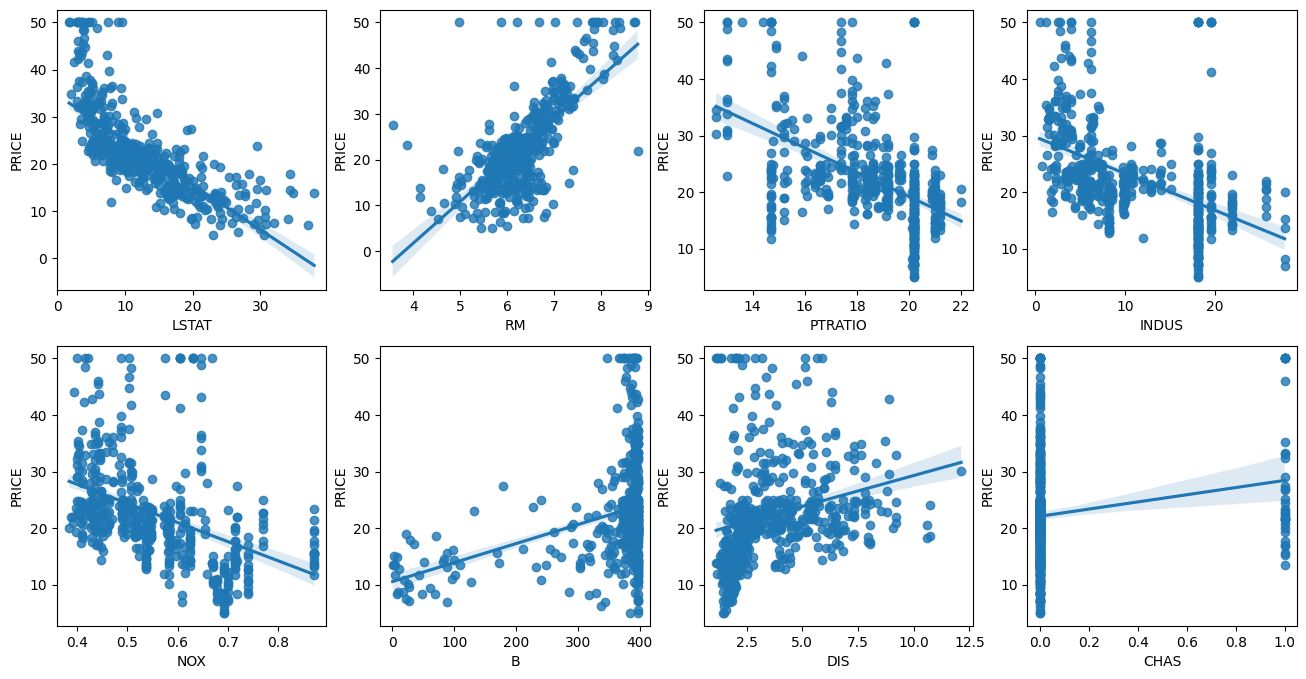

In [23]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)

# lm_features = ['LSTAT','RM','PTRATIO','INDUS','NOX','ZN','AGE','RAD']
lm_features = ['LSTAT','RM','PTRATIO','INDUS','NOX','B','DIS','CHAS']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y='PRICE',data=bostonDF , ax=axs[row][col])

<AxesSubplot: >

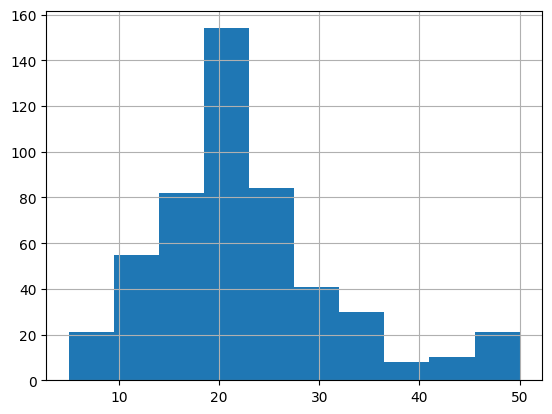

In [24]:
#레이블의 분포
bostonDF['PRICE'].hist()

In [25]:
#레이블의 분포
bostonDF['PRICE'].value_counts()

50.0    16
25.0     8
22.0     7
21.7     7
23.1     7
        ..
32.9     1
34.6     1
30.3     1
33.3     1
8.1      1
Name: PRICE, Length: 229, dtype: int64

<div >
<font size="3em" style="font-weight:bold;color:#3f8dbf;"></font>
트리계열은 데이터 스케일링의 필요성이 다소 적으므로 스케일링 과정은 패스한다.  <br>
</div> 

## 모델 학습: 교차검증 + 랜덤포레스트

In [28]:
y_train = bostonDF['PRICE']
X_train = bostonDF.drop('PRICE', axis=1)

In [31]:
type(X_train),type(y_train)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [30]:
X_train.shape

(506, 13)

In [32]:
y_train.shape

(506,)

In [33]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [65]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=0, n_estimators=1000)

#score:neg_mean_squared_error
#cv:5개

neg_mse_scores = cross_val_score(rf,X_train,y_train,scoring='neg_mean_squared_error', cv=5)


In [66]:
rmse_scores  = np.sqrt(-1 * neg_mse_scores)

avg_rmse = np.mean(rmse_scores)

print(' 5 교차 검증의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 교차 검증의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 교차 검증의 개별 Negative MSE scores:  [ -5.55 -14.53 -14.55 -21.57 -10.27]
 5 교차 검증의 개별 RMSE scores :  [2.36 3.81 3.81 4.64 3.2 ]
 5 교차 검증의 평균 RMSE : 3.566 


In [76]:
# 함수 생성함
def get_model_cv_prediction(model,X_data,y_target):
    # 교차검증
    neg_mse_scores = cross_val_score(model,X_data,y_target,scoring='neg_mean_squared_error',cv=5)

    # 평가
    rmse_score = np.sqrt(-1,neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)

    print(' 5 교차 검증의 평균 RMSE : {0:.3f}'.format(avg_rmse))

## 모델학습:회귀트리클래스 모두사용

In [68]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

dt=DecisionTreeRegressor(random_state=0) #RMSE=5.486
rf=RandomForestRegressor(random_state=0 ,n_estimators=1000)
gb=GradientBoostingRegressor(random_state=0,n_estimators=1000)

model=[dt,rf,gb]
for md in model:
   print(md)
   get_model_cv_prediction(md,X_train,y_train)

DecisionTreeRegressor(random_state=0)


C:\Users\khs\AppData\Local\Temp\ipykernel_19628\2281127497.py:7: RuntimeWarning: invalid value encountered in sqrt
  rmse_score = np.sqrt(-1,neg_mse_scores)


 5 교차 검증의 평균 RMSE : 3.566
RandomForestRegressor(n_estimators=1000, random_state=0)


C:\Users\khs\AppData\Local\Temp\ipykernel_19628\2281127497.py:7: RuntimeWarning: invalid value encountered in sqrt
  rmse_score = np.sqrt(-1,neg_mse_scores)


 5 교차 검증의 평균 RMSE : 3.566
GradientBoostingRegressor(n_estimators=1000, random_state=0)
 5 교차 검증의 평균 RMSE : 3.566


C:\Users\khs\AppData\Local\Temp\ipykernel_19628\2281127497.py:7: RuntimeWarning: invalid value encountered in sqrt
  rmse_score = np.sqrt(-1,neg_mse_scores)


In [69]:
!pip install -U xgboost

     -------------------------------------- 125.4/125.4 MB 3.3 MB/s eta 0:00:00


In [77]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

#xgboost
from xgboost import XGBRegressor

dt=DecisionTreeRegressor(random_state=0) #RMSE=5.486
rf=RandomForestRegressor(random_state=0 ,n_estimators=1000)
gb=GradientBoostingRegressor(random_state=0,n_estimators=1000)

xg=XGBRegressor(n_estimators=1000)

model=[dt,rf,gb,xg]
for md in model:
   # print(md)
   get_model_cv_prediction(md,X_train,y_train)

C:\Users\khs\AppData\Local\Temp\ipykernel_19628\2990199486.py:7: RuntimeWarning: invalid value encountered in sqrt
  rmse_score = np.sqrt(-1,neg_mse_scores)


 5 교차 검증의 평균 RMSE : 3.566


C:\Users\khs\AppData\Local\Temp\ipykernel_19628\2990199486.py:7: RuntimeWarning: invalid value encountered in sqrt
  rmse_score = np.sqrt(-1,neg_mse_scores)


 5 교차 검증의 평균 RMSE : 3.566


C:\Users\khs\AppData\Local\Temp\ipykernel_19628\2990199486.py:7: RuntimeWarning: invalid value encountered in sqrt
  rmse_score = np.sqrt(-1,neg_mse_scores)


 5 교차 검증의 평균 RMSE : 3.566
 5 교차 검증의 평균 RMSE : 3.566


C:\Users\khs\AppData\Local\Temp\ipykernel_19628\2990199486.py:7: RuntimeWarning: invalid value encountered in sqrt
  rmse_score = np.sqrt(-1,neg_mse_scores)


## 변수 중요도

<AxesSubplot: >

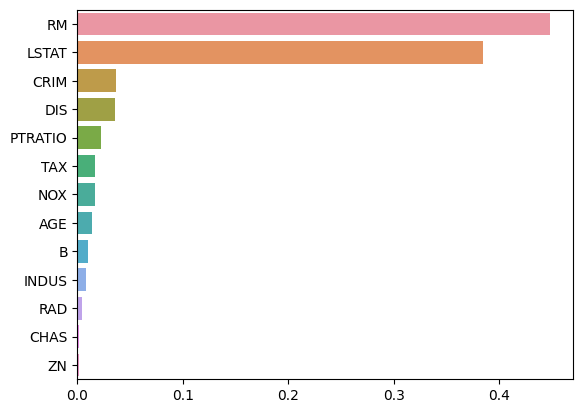

In [75]:
import seaborn as sns
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators=1000)

# 앞 예제에서 만들어진 X_data, y_target 데이터 셋을 적용하여 학습합니다.   
rf_reg.fit(X_train, y_train)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_train.columns )
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x= feature_series, y=feature_series.index)


---